In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load dataset
iris = load_iris()
X = iris.data   # features (sepal length, sepal width, petal length, petal width)
y = iris.target # labels (0: setosa, 1: versicolor, 2: virginica)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert labels to one-hot encoding
y = to_categorical(y)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def build_and_train_model(hidden_layers, activation, epochs=50):
    model = Sequential()

    # Input + First hidden layer
    model.add(Dense(hidden_layers[0], input_dim=4, activation=activation))

    # Additional hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))

    # Output layer (3 classes → softmax)
    model.add(Dense(3, activation="softmax"))

    # Compile model
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Train model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=8,
                        validation_data=(X_test, y_test), verbose=0)

    # Evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Hidden Layers: {hidden_layers}, Activation: {activation}, Accuracy: {acc:.4f}, Loss: {loss:.4f}")

    return history


In [ ]:
histories = {}

# Model 1: One hidden layer, relu
histories["1 layer - relu"] = build_and_train_model([8], "relu", epochs=100)

# Model 2: Two hidden layers, relu
histories["2 layers - relu"] = build_and_train_model([16, 8], "relu", epochs=100)

# Model 3: Two hidden layers, tanh
histories["2 layers - tanh"] = build_and_train_model([16, 8], "tanh", epochs=100)

# Model 4: Three hidden layers, relu
histories["3 layers - relu"] = build_and_train_model([32, 16, 8], "relu", epochs=100)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Hidden Layers: [8], Activation: relu, Accuracy: 1.0000, Loss: 0.1250
Hidden Layers: [16, 8], Activation: relu, Accuracy: 1.0000, Loss: 0.0411
Hidden Layers: [16, 8], Activation: tanh, Accuracy: 0.9667, Loss: 0.0514
Hidden Layers: [32, 16, 8], Activation: relu, Accuracy: 1.0000, Loss: 0.0187


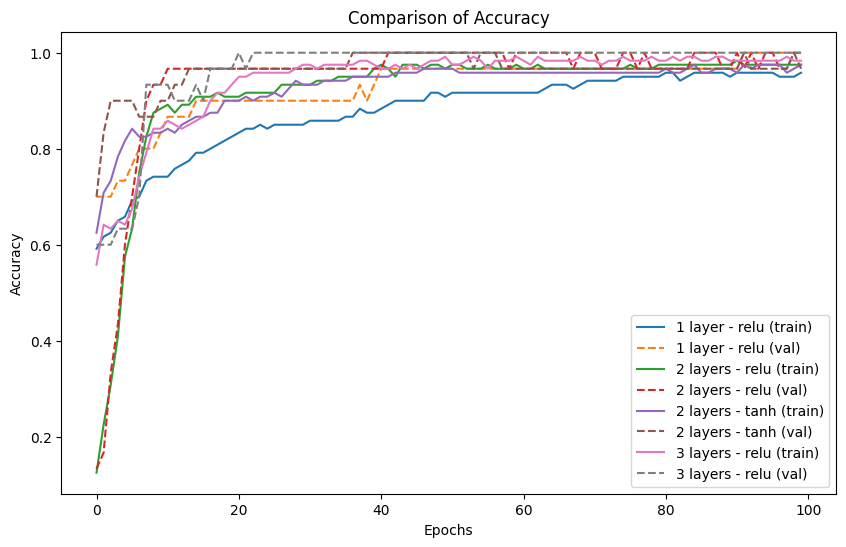

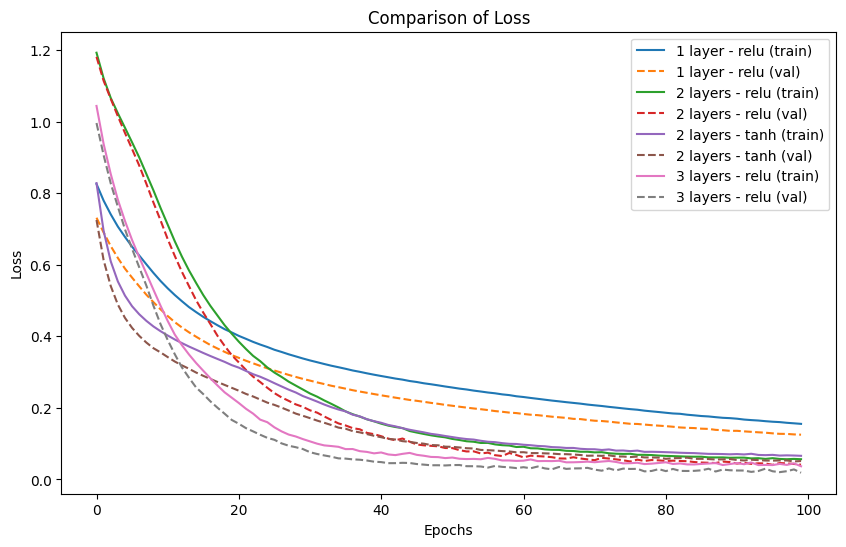

In [ ]:
def plot_history(histories, metric):
    plt.figure(figsize=(6, 10)) # Adjusted figure size for vertical layout
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f"{name} (train)")
        plt.plot(history.history["val_" + metric], linestyle="--", label=f"{name} (val)")
    plt.title(f"Comparison of {metric.capitalize()}")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot Accuracy
plot_history(histories, "accuracy")

# Plot Loss
plot_history(histories, "loss")